In [ ]:
from google.colab import files
uploaded = files.upload()

Saving cleaned_data_feature_selection_NEW.csv to cleaned_data_feature_selection_NEW.csv


In [ ]:
import io
import pandas as pd
df = pd.read_csv(io.BytesIO(uploaded['cleaned_data_feature_selection_NEW.csv']))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
# Prepare the data
X = df.drop(['CLASS', 'Unnamed: 0'], axis=1)
y = df['CLASS']
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [ ]:
# Split the data
X_train, X_test, y_train_encoded, y_test_encoded = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

In [ ]:
xgb_classifier = XGBClassifier()

In [ ]:
parameters = {
    'max_depth': (2, 3, 4, 5, 6, 7, 8),
    'n_estimators':(300, 400, 500, 600, 700),
    'learning_rate': [0.1, 0.01, 0.05, 0.001]
}

gs_xgb = GridSearchCV(xgb_classifier, parameters)

gs_xgb.fit(X_train, y_train_encoded)

GridSearchCV(estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_b...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.1, 0.01, 0.05, 0.001],
                         'max_depth': (2, 3, 4, 5, 6, 7, 8),
                         'n_estimators': (300, 400, 500, 600, 700)})

In [ ]:
# Predict and evaluate
y_pred_xgb = gs_xgb.predict(X_test)
test_accuracy = accuracy_score(y_test_encoded, y_pred_xgb)
conf_matrix_rf = confusion_matrix(y_test_encoded, y_pred_xgb)

Accuracy: 0.9826839826839827
Confusion Matrix:


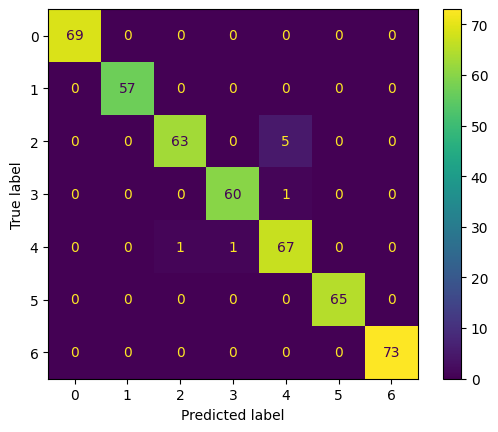

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

print(f"Accuracy: {test_accuracy}")
print("Confusion Matrix:")

confusion_matrix = confusion_matrix(y_test_encoded, y_pred_xgb)
cm_display = ConfusionMatrixDisplay(confusion_matrix = confusion_matrix)
cm_display.plot()
plt.show()

In [ ]:
from sklearn.metrics import precision_score, f1_score

# Calculate precision
precision = precision_score(y_test_encoded, y_pred_xgb, average='macro')
print(f'Precision: {precision}')

# Calculate F1 score
f1 = f1_score(y_test_encoded, y_pred_xgb, average='macro')
print(f'F1 Score: {f1}')

Precision: 0.9836842537935901
F1 Score: 0.9831162833933557
